## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 確認硬體資源
"""
Your code here
"""

!nvidia-smi

Tue Apr 02 22:10:37 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 398.82                 Driver Version: 398.82                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce MX150      WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   37C    P8    N/A /  N/A |    315MiB /  2048MiB |      6%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [3]:
import os
import keras

# Try to enable GPU (optional)


C:\ProgramData\Anaconda3\envs\tensorflow_cpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
train, test = keras.datasets.cifar10.load_data()

In [5]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [6]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
"""
Your code here
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [8]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [9]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [10]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 19s 371us/step - loss: 1.9311 - acc: 0.3022 - val_loss: 1.7625 - val_acc: 0.3682
Epoch 2/100
50000/50000 [==============================] - 17s 341us/step - loss: 1.7062 - acc: 0.3917 - val_loss: 1.6853 - val_acc: 0.3978
Epoch 3/100
50000/50000 [==============================] - 17s 337us/step - loss: 1.6210 - acc: 0.4201 - val_loss: 1.6307 - val_acc: 0.4210
Epoch 4/100
50000/50000 [==============================] - 18s 355us/step - loss: 1.5496 - acc: 0.4485 - val_loss: 1.5911 - val_acc: 0.4301
Epoch 5/100
50000/50000 [==============================] - 17s 332us/step - loss: 1.5054 - acc: 0.4609 - val_loss: 1.4857 - val_acc: 0.4742
Epoch 6/100
50000/50000 [==============================] - 17s 348us/step - loss: 1.4670 - acc: 0.4770 - val_loss: 1.5282 - val_acc: 0.4462
Epoch 7/100
50000/50000 [==============================] - 18s 352us/step - loss: 1.4376 - acc: 0.4887 - val_l

Epoch 59/100
50000/50000 [==============================] - 17s 334us/step - loss: 0.5600 - acc: 0.7997 - val_loss: 1.9644 - val_acc: 0.5060
Epoch 60/100
50000/50000 [==============================] - 17s 333us/step - loss: 0.5576 - acc: 0.8016 - val_loss: 1.9642 - val_acc: 0.5098
Epoch 61/100
50000/50000 [==============================] - 16s 329us/step - loss: 0.5513 - acc: 0.8021 - val_loss: 2.0278 - val_acc: 0.5020
Epoch 62/100
50000/50000 [==============================] - 17s 334us/step - loss: 0.5106 - acc: 0.8165 - val_loss: 2.0531 - val_acc: 0.5096
Epoch 63/100
50000/50000 [==============================] - 17s 332us/step - loss: 0.5157 - acc: 0.8146 - val_loss: 2.0774 - val_acc: 0.5098
Epoch 64/100
50000/50000 [==============================] - 17s 333us/step - loss: 0.5101 - acc: 0.8167 - val_loss: 2.0429 - val_acc: 0.5094
Epoch 65/100
50000/50000 [==============================] - 17s 331us/step - loss: 0.4947 - acc: 0.8229 - val_loss: 2.1193 - val_acc: 0.5100
Epoch 66/100


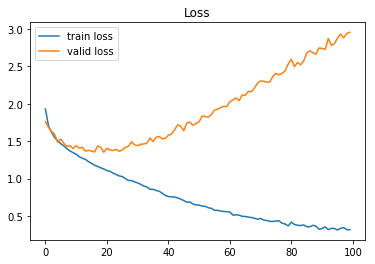

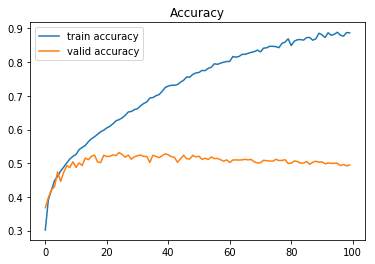

In [12]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()